# PREDATOR: **PRED**icting the imp**A**ct of cancer somatic mu**T**ations on pr**O**tein-protein inte**R**actions


## Swaney


<b><i class="fa fa-folder-o" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Location</b><br>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">C:\Users\ibrah\Documents\GitHub\Predicting-Mutation-Effects\src\benchmark\Swaney_Science2021</code>
</p>

<b><i class="far fa-file" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Name</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">PredictionsSwaney.ipynb</code>
</p>

<b><i class="far fa-calendar-alt" area-hidden="true" style="color:#1976D2"> </i>&nbsp; Last Edited</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">Nov 06th, 2021</code>
</p>


<div class="alert alert-block" style="background-color: #F5F5F5; border: 1px solid; padding: 10px; border-color: #E0E0E0">
    <b><i class="fa fa-compass" aria-hidden="true" style="color:#404040"></i></b>&nbsp; <b style="color: #404040">Purpose </b> <br>
<div>
   
- [X] Apply on Swaney et al. interactions.
    
**Dependent files:**

* Target (Swaney) data: 
    - *tba*

In [1]:
import os
import os.path as op
from pathlib import Path

os.chdir("../..")

from PredatorClassifier import PredatorClassifier

# PATHS
TARGET_PATH = Path(r"../src/benchmark/Swaney_Science2021/P42336_H1047R_O00459.txt")
PREDATOR_MODEL_PATH = Path(r"PredatorModels/PredatorModel_2021-10-24/04f37897/predator.pkl")
PREDICTIONS_DATASETS_FOLDER_PATH = "benchmark/Swaney_Science2021/"

# Reflect changes in the modules immediately.
%load_ext autoreload
%autoreload 2

2021-11-07 23:04:58 | INFO     | helpers.helpers_predator.common | Predator object PredatorModels\PredatorModel_2021-10-24\04f37897\predator.pkl is loaded successfully.
2021-11-07 23:04:58 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `newone` ..
2021-11-07 23:04:58 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `target_newone_data` ..
2021-11-07 23:04:58 | DEBUG    | helpers.helpers_predator.data_materials | Initializing target data materials ..
2021-11-07 23:04:58 | DEBUG    | helpers.helpers_predator.data_materials | Determined features: ['Provean_score', 'EL2_score', 'Final_ddG', 'Interactor_alignment_score', 'Solvent_accessibility_wt', 'Matrix_score', 'Solvent_accessibility_mut', 'van_der_waals_mut', 'Interactor_template_sequence_identity', 'solvation_polar_wt']
2021-11-07 23:04:58 | DEBUG    | helpers.helpers_predator.data_materials | Declaring Xs_newone data materials  ..
Data dimensions: (2, 103)


,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,Domain_clan,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,P42336,P42336,H1047R,done,interface,COSM94986,-,VAR_026192,PI3_PI4_kinase,PI3_PI4_kinase,...,358.0,85.8877,86.0062,43.5774,43.5774,209.145,134.410,343.55,5.34912,4.14613
1,P42336,P42336,H1047R,done,interface,COSM94986,-,VAR_026192,PI3_PI4_kinase,PI3_PI4_kinase,...,359.0,92.6788,92.6377,63.6778,63.6778,146.565,82.535,229.10,5.46525,5.46525


Data dimensions: (2, 61)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Template_sequence_identity,Alignment_score,Interactor_template_sequence_identity,Interactor_alignment_score,Final_ddG,ProtBert_score,ProteinSolver_score,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,P42336,H1047R,O00459,0.5703,0.577806,1.0000,0.929825,0.743292,-0.003775,0.049220,...,358.0,85.8877,86.0062,43.5774,43.5774,209.145,134.410,343.55,5.34912,4.14613
1,P42336,H1047R,O00459,0.5703,0.577806,0.3462,0.330726,0.969487,-0.005268,0.025444,...,359.0,92.6788,92.6377,63.6778,63.6778,146.565,82.535,229.10,5.46525,5.46525


2021-11-07 23:04:59 | DEBUG    | Predator | Predicting on cancer datasets ..
2021-11-07 23:04:59 | DEBUG    | helpers.helpers_predator.models | Initializing EnsambledVotingClassifier.
2021-11-07 23:04:59 | DEBUG    | helpers.helpers_predator.models | Voting mode: hard
2021-11-07 23:04:59 | DEBUG    | helpers.helpers_predator.predictions | Initializing: PredictionsHard
2021-11-07 23:04:59 | DEBUG    | Predator | Predicting on newone cohort ..
2021-11-07 23:04:59 | DEBUG    | helpers.helpers_predator.models | Current estimator: RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=4,
                       max_features='sqrt', n_estimators=600,
                       random_state=14593)
2021-11-07 23:04:59 | DEBUG    | helpers.helpers_predator.models | X shape: (2, 10)
2021-11-07 23:04:59 | DEBUG    | helpers.helpers_predator.models | Current estimator: RandomForestClassifier(bootstrap=False, max_depth=8, max_features=None,
                       min_samples_leaf=2, 

[array([0, 0], dtype=int64),
 array([0, 0], dtype=int64),
 array([0, 0], dtype=int64)]

2021-11-07 23:05:00 | DEBUG    | helpers.helpers_predator.predictions | Initializing value counts ..


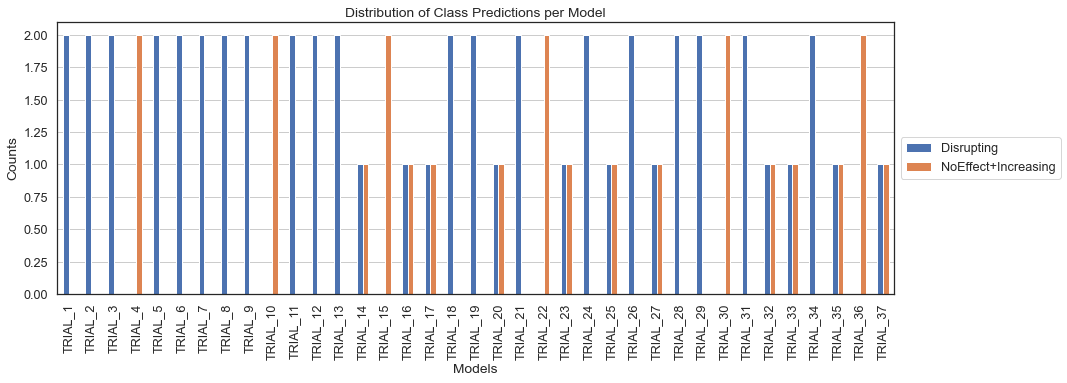

2021-11-07 23:05:01 | DEBUG    | helpers.helpers_predator.predictions | PredictionsHard
2021-11-07 23:05:01 | DEBUG    | helpers.helpers_predator.predictions | Post processing predictions for cohort newone ..
2021-11-07 23:05:01 | DEBUG    | helpers.helpers_predator.predictions | Merging predictions with newone cancer dataset ..
2021-11-07 23:05:01 | DEBUG    | helpers.helpers_predator.predictions | Handling valid and invalid entries ..


  0%|          | 0/37 [00:00<?, ?it/s]

2021-11-07 23:05:01 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 0): 
Empty DataFrame
Columns: [PREDICTION, PROTEIN, MUTATION, INTERACTOR]
Index: []
2021-11-07 23:05:01 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 0): 
Empty DataFrame
Columns: [PREDICTION, PROTEIN, MUTATION, INTERACTOR]
Index: []
2021-11-07 23:05:01 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 0): 
Empty DataFrame
Columns: [PREDICTION, PROTEIN, MUTATION, INTERACTOR]
Index: []
2021-11-07 23:05:01 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 0): 
Empty DataFrame
Columns: [PREDICTION, PROTEIN, MUTATION, INTERACTOR]
Index: []
2021-11-07 23:05:01 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 0): 
Empty DataFrame
Columns: [PREDICTION, PROTEIN, MUTATION, INTERACTOR]
Index: []
2021-11-07

,Prediction,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,0,P42336,P42336,H1047R,done,interface,COSM94986,-,VAR_026192,PI3_PI4_kinase,...,358.0,85.8877,86.0062,43.5774,43.5774,209.145,134.410,343.55,5.34912,4.14613
1,0,P42336,P42336,H1047R,done,interface,COSM94986,-,VAR_026192,PI3_PI4_kinase,...,359.0,92.6788,92.6377,63.6778,63.6778,146.565,82.535,229.10,5.46525,5.46525


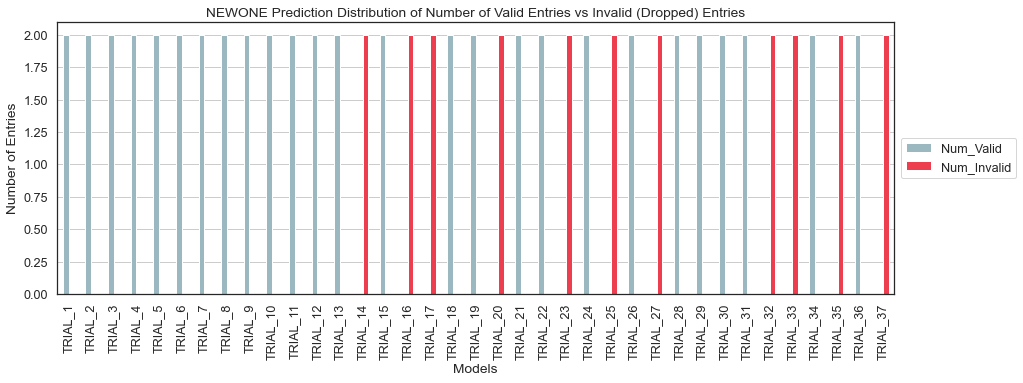

2021-11-07 23:05:02 | DEBUG    | helpers.helpers_predator.predictions | Plotting number of finalized predictions per model.
Note that following plot shows the number of (protein, mutation, interactor) triplets which had valid prediction.


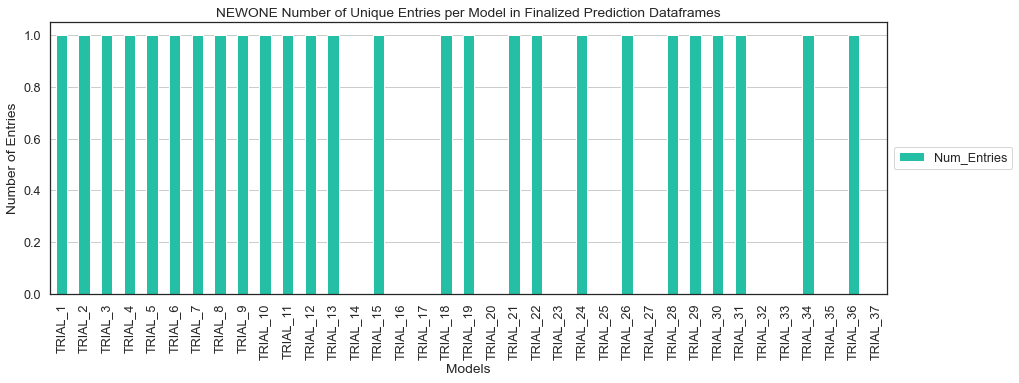

2021-11-07 23:05:03 | DEBUG    | helpers.helpers_predator.predictions | PredictionsHard
2021-11-07 23:05:03 | DEBUG    | helpers.helpers_predator.predictions | Preparing ensemble prediction data for newone ..


  0%|          | 0/1 [00:00<?, ?it/s]

2021-11-07 23:05:03 | DEBUG    | helpers.helpers_predator.predictions | Ensemble prediction data for newone is prepared.
2021-11-07 23:05:03 | DEBUG    | helpers.helpers_predator.predictions | Resulting prediction data is available for newone.
Accessible from predictions.['newone_prediction_results']
2021-11-07 23:05:03 | DEBUG    | helpers.helpers_predator.predictions | Resulting prediction data (no_votes dropped) is available for newone.
Accessible from predictions.['newone_prediction_results_no_votes_dropped']
Data dimensions: (1, 7)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Num_preds_0,Num_preds_1,Num_preds_NO_VOTE,VOTED_PREDICTION
0,P42336,H1047R,O00459,20,6,11,0


Data dimensions: (2, 103)


,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,Domain_clan,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,P42336,P42336,H1047R,done,interface,COSM94986,-,VAR_026192,PI3_PI4_kinase,PI3_PI4_kinase,...,358.0,85.8877,86.0062,43.5774,43.5774,209.145,134.410,343.55,5.34912,4.14613
1,P42336,P42336,H1047R,done,interface,COSM94986,-,VAR_026192,PI3_PI4_kinase,PI3_PI4_kinase,...,359.0,92.6788,92.6377,63.6778,63.6778,146.565,82.535,229.10,5.46525,5.46525


Data dimensions: (2, 10)


,Provean_score,EL2_score,Final_ddG,Interactor_alignment_score,Solvent_accessibility_wt,Matrix_score,Solvent_accessibility_mut,van_der_waals_mut,Interactor_template_sequence_identity,solvation_polar_wt
0,-4.81,-0.220716,0.743292,0.929825,82.6313,0.0,79.8415,-7.49716,1.0000,7.93361
1,-4.81,-0.388156,0.969487,0.330726,68.9025,0.0,87.6548,-4.67915,0.3462,4.63133


Data dimensions: (1, 4)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction
0,P42336,H1047R,O00459,0


Data dimensions: (1, 4)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction
0,P42336,H1047R,O00459,0


Label counts:
Disrupting    1
Name: Prediction, dtype: int64
2021-11-07 23:05:03 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `newone` ..
2021-11-07 23:05:03 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `target_newone_data` ..
2021-11-07 23:05:03 | DEBUG    | helpers.helpers_predator.data_materials | Initializing target data materials ..
2021-11-07 23:05:03 | DEBUG    | helpers.helpers_predator.data_materials | Determined features: ['Provean_score', 'EL2_score', 'Final_ddG', 'Interactor_alignment_score', 'Solvent_accessibility_wt', 'Matrix_score', 'Solvent_accessibility_mut', 'van_der_waals_mut', 'Interactor_template_sequence_identity', 'solvation_polar_wt']
2021-11-07 23:05:03 | DEBUG    | helpers.helpers_predator.data_materials | Declaring Xs_newone data materials  ..
2021-11-07 23:05:03 | DEBUG    | Predator | Predicting on cancer datasets ..
2021-11-07 23:05:03 | DEBUG    | helpers.helpers_predator.models | Initializing EnsambledVotingClass

dict_keys(['newone_prob'])

[array([[0.65248365, 0.34751635],
        [0.65464449, 0.34535551]]),
 array([[1., 0.],
        [1., 0.]]),
 array([[0.77263679, 0.22736321],
        [0.72762164, 0.27237836]])]

2021-11-07 23:05:04 | DEBUG    | helpers.helpers_predator.predictions | PredictionsSoft
2021-11-07 23:05:04 | DEBUG    | helpers.helpers_predator.predictions | Post processing predictions for cohort newone ..
2021-11-07 23:05:04 | DEBUG    | helpers.helpers_predator.predictions | PredictionsSoft
2021-11-07 23:05:04 | DEBUG    | helpers.helpers_predator.predictions | Merging predictions with newone cancer dataset ..
2021-11-07 23:05:04 | DEBUG    | helpers.helpers_predator.predictions | Handling valid and invalid entries ..


  0%|          | 0/37 [00:00<?, ?it/s]

2021-11-07 23:05:04 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 0): 
Empty DataFrame
Columns: [PREDICTION, PROTEIN, MUTATION, INTERACTOR]
Index: []
2021-11-07 23:05:04 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 0): 
Empty DataFrame
Columns: [PREDICTION, PROTEIN, MUTATION, INTERACTOR]
Index: []
2021-11-07 23:05:04 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 0): 
Empty DataFrame
Columns: [PREDICTION, PROTEIN, MUTATION, INTERACTOR]
Index: []
2021-11-07 23:05:04 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 0): 
Empty DataFrame
Columns: [PREDICTION, PROTEIN, MUTATION, INTERACTOR]
Index: []
2021-11-07 23:05:04 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 0): 
Empty DataFrame
Columns: [PREDICTION, PROTEIN, MUTATION, INTERACTOR]
Index: []
2021-11-07

dict_keys(['newone_prob', 'newone_predicted_probs_datasets', 'newone_predicted_valid_datasets', 'newone_predicted_invalid_datasets', 'newone_finalized_prediction_dataframes'])

Data dimensions: (2, 104)


,Prediction,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,0.347516,P42336,P42336,H1047R,done,interface,COSM94986,-,VAR_026192,PI3_PI4_kinase,...,358.0,85.8877,86.0062,43.5774,43.5774,209.145,134.410,343.55,5.34912,4.14613
1,0.345356,P42336,P42336,H1047R,done,interface,COSM94986,-,VAR_026192,PI3_PI4_kinase,...,359.0,92.6788,92.6377,63.6778,63.6778,146.565,82.535,229.10,5.46525,5.46525


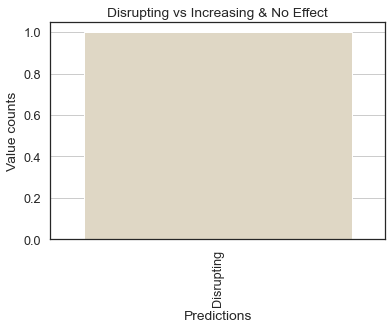

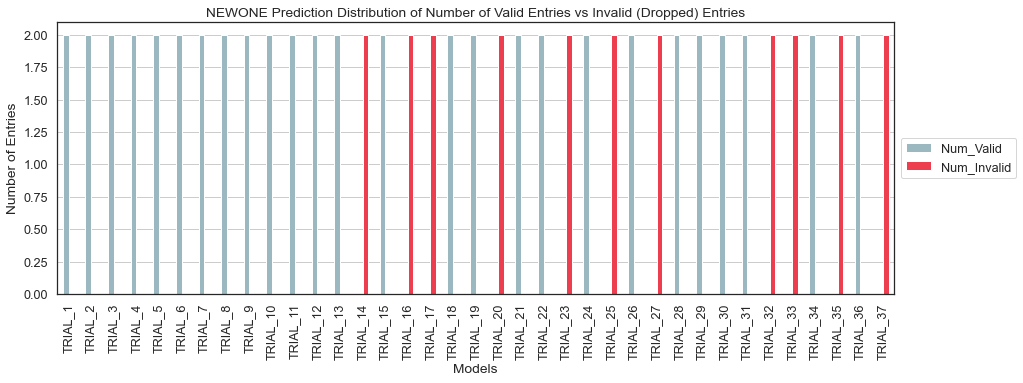

2021-11-07 23:05:05 | DEBUG    | helpers.helpers_predator.predictions | Plotting number of finalized predictions per model.
Note that following plot shows the number of (protein, mutation, interactor) triplets which had valid prediction.


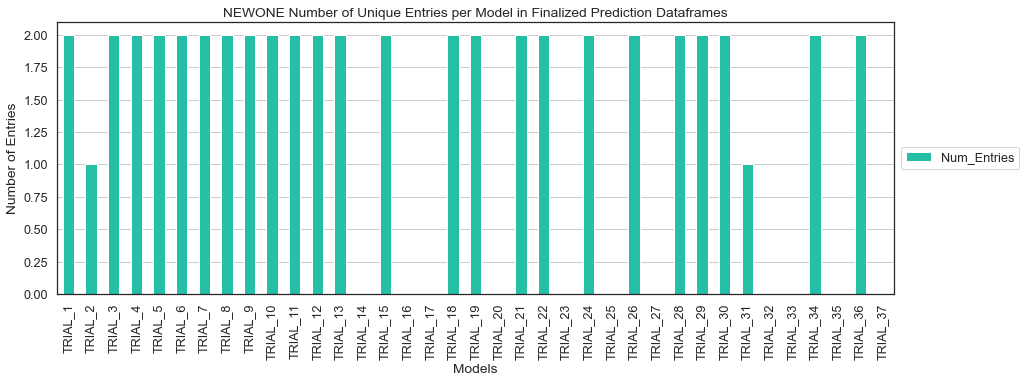

Data dimensions: (2, 4)


,Prediction,UniProt_ID,Mutation,Interactor_UniProt_ID
0,0.347516,P42336,H1047R,O00459
1,0.345356,P42336,H1047R,O00459


2021-11-07 23:05:06 | INFO     | helpers.helpers_predator.predictions | PredictionsSoft
2021-11-07 23:05:06 | INFO     | helpers.helpers_predator.predictions | Preparing ensemble prediction data for newone taking median ..


  0%|          | 0/37 [00:00<?, ?it/s]

2021-11-07 23:05:06 | DEBUG    | helpers.helpers_predator.predictions | Prediction probabilities data for newone is prepared.
Accessible from `newone_predictions_prob_data`.
2021-11-07 23:05:06 | DEBUG    | helpers.helpers_predator.predictions | Ensemble prediction data for newone is prepared.
Accessible from `newone_ensemble_prediction_data`.
2021-11-07 23:05:06 | DEBUG    | helpers.helpers_predator.predictions | Resulting prediction data is available for newone.
Accessible from predictions.['newone_prediction_results']
2021-11-07 23:05:06 | DEBUG    | helpers.helpers_predator.predictions | Resulting prediction data (no_votes dropped) is available for newone.
Accessible from predictions.['newone_prediction_results_no_votes_dropped']
Data dimensions: (1, 39)


,Trial 0,Trial 1,Trial 2,Trial 3,Trial 4,Trial 5,Trial 6,Trial 7,Trial 8,Trial 9,...,Trial 29,Trial 30,Trial 31,Trial 32,Trial 33,Trial 34,Trial 35,Trial 36,PROB_1s_AVG,VOTED_PREDICTION
0,0.346436,0.0,0.249871,0.623046,0.376449,0.404789,0.426801,0.211563,0.462046,0.62109,...,0.625926,0.12439,NO_VOTE,NO_VOTE,0.472951,NO_VOTE,0.568254,NO_VOTE,0.41193,0


Data dimensions: (1, 4)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction
0,P42336,H1047R,O00459,0


Data dimensions: (1, 4)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction
0,P42336,H1047R,O00459,0


Label counts:
Disrupting    1
Name: Prediction, dtype: int64
Data dimensions: (1, 4)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction
0,P42336,H1047R,O00459,0


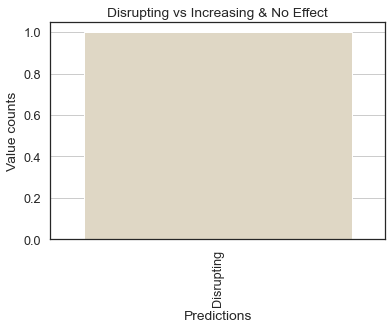

In [2]:
pc = PredatorClassifier("NewOne", TARGET_PATH, PREDATOR_MODEL_PATH, PREDICTIONS_DATASETS_FOLDER_PATH)

In [3]:
pc.target_prediction_results

,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction
0,P42336,H1047R,O00459,0


In [3]:
pc.target_prediction_results

,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction
0,P01112,G12D,O15211,1
1,P01112,G12D,Q13671,1
